<b>Исследование синхронизации нейроморфных сетей тесного мира.</b>

Участники:\
    Пеганов Никита\
    Диана Мустаева\
    Роман Головин

In [141]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
from brian2 import *
from random import *

Составляем граф модели тесного мира.

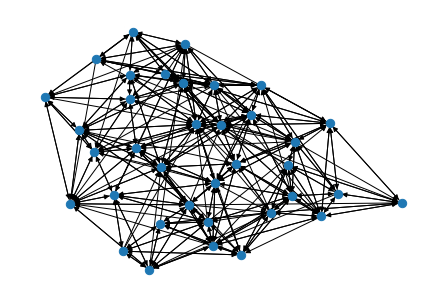

In [142]:
side = 6
sw = nx.navigable_small_world_graph(side, p=2, q=6)
options = {
    'node_size': 70,
    'width': 1,
}
nx.draw(sw, **options)

In [143]:
side = 20
sw = nx.navigable_small_world_graph(side, p=2, q=6)

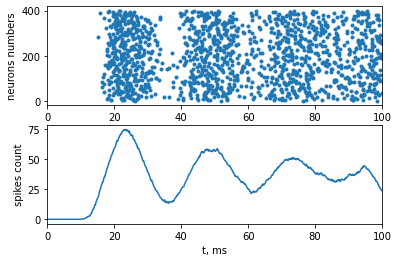

In [144]:
# константы
N = side ** 2
Vr = 10 * mV
theta = 20 * mV
tau = 20 * ms
delta = 2 * ms
taurefr = 2 * ms
duration = .1 * second
J = .1 * mV
muext = 25 * mV
sigmaext = 1 * mV

vertex_num = lambda vertex: vertex[0] * side + vertex[1]
eqs = """
      dV/dt = (-V+muext + sigmaext * sqrt(tau) * xi)/tau : volt
      """
group = NeuronGroup(N, eqs, threshold='V>theta',
                    reset='V=Vr', refractory=taurefr, method='euler')
group.V = Vr

# расстановка весов у синапсов
syn = Synapses(group, group, 'w : 1', on_pre='V += -J')
for edge in sw.edges:
    syn.connect(i=vertex_num(edge[0]), j=vertex_num(edge[1]))
    syn.w = '0.5'

M = SpikeMonitor(group)
LFP = PopulationRateMonitor(group)
net = Network(group, syn, M, LFP)
net.run(duration)
subplot(211)
plot(M.t/ms, M.i, '.')
xlim(0, duration/ms)
xlabel('t, ms')
ylabel('neurons numbers')
subplot(212)
plot(LFP.t/ms, LFP.smooth_rate(window='flat', width=10*ms)/Hz)
xlim(0, duration/ms)
xlabel('t, ms')
ylabel('spikes count')
show()

Нейроны синхронизировались.

Удаление нейрона

In [145]:
def delete_neuron(number):
    for i in list(syn.i):
        if syn.i[i] == number:
            syn.w[i] = 0

Определение степени синхронизации.

In [146]:
def find_min_max(count=4, start=20, dist=10):
    maxs = [0] * count
    maxs_j = [0] * count
    mins = [float('inf')] * count
    mins_j = [0] * count
    last_max_j, last_min_j = 0, 0
    for j in range(len(LFP.smooth_rate(window='flat', width=10*ms)/Hz)):
        elem = list(LFP.smooth_rate(window='flat', width=10*ms)/Hz)[j]
        for i in range(len(maxs)):
            if j - last_max_j > dist and elem > maxs[i]:
                maxs[i + 1:] = maxs[i:-1].copy()
                maxs_j[i + 1:] = maxs_j[i:-1].copy()
                maxs[i] = elem
                maxs_j[i] = j
                last_max_j = j
                break
        for i in range(len(mins)):
            if list(LFP.t/ms)[j] > start and j - last_min_j > dist and elem < mins[i]:
                mins[i + 1:] = mins[i:-1].copy()
                mins_j[i + 1:] = mins_j[i:-1].copy()
                mins[i] = elem
                mins_j[i] = j
                last_min_j = j
                break
    return maxs_j, mins_j

In [147]:
def find_sum(lis_max, lis_min):
    return (lis_min[0] - lis_max[0])**2 + (lis_min[1] - lis_max[1])**2 + (lis_min[2] - lis_max[2])**2 + (lis_min[3] - lis_max[3])**2 

Поочередно удаляем нейроны и считаем степень синхронизации полученной сети.

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000


[534.96 * msecond2,
 713.9 * msecond2,
 597.78 * msecond2,
 605.16 * msecond2,
 646.78 * msecond2,
 656.82 * msecond2,
 607.42 * msecond2,
 588.06 * msecond2,
 627.42 * msecond2,
 656.82 * msecond2,
 659.24 * msecond2,
 602.62 * msecond2,
 703.38 * msecond2,
 566.44 * msecond2,
 597.78 * msecond2,
 588.22 * msecond2,
 605.16 * msecond2,
 625. * msecond2,
 655.36 * msecond2,
 669.36 * msecond2,
 646.78 * msecond2,
 615.04 * msecond2,
 619.56 * msecond2,
 605.16 * msecond2,
 556.96 * msecond2,
 627.42 * msecond2,
 568.86 * msecond2,
 646.78 * msecond2,
 710.64 * msecond2,
 687.42 * msecond2]

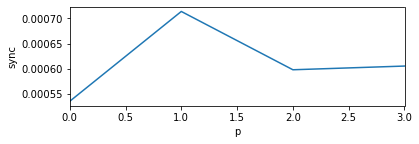

In [150]:
remain_neurons = list(range(side ** 2))
sync = []
prev = copy(LFP.smooth_rate(window='flat', width=10.1*ms)/Hz)
print(len(prev))
for i in range(30):
    group = NeuronGroup(N, eqs, threshold='V>theta',
                    reset='V=Vr', refractory=taurefr, method='euler')
    group.V = Vr
    syn = Synapses(group, group, 'w : 1', on_pre='V += -J')
    for edge in sw.edges:
        syn.connect(i=vertex_num(edge[0]), j=vertex_num(edge[1]))
        syn.w = '0.5'

    M = SpikeMonitor(group)
    LFP = PopulationRateMonitor(group)
    net = Network(group, syn, M, LFP)
    for j in range(10):
        deleting_neuron = choice(remain_neurons)
        delete_neuron(deleting_neuron)
        remain_neurons.remove(deleting_neuron)
    net.run(duration)
    
    new_one = LFP.smooth_rate(window='flat', width=10.1*ms)/Hz
    # print(any([new_one[k] - prev[k] for k in range(min(len(new_one), len(prev))]))
    # prev = copy(new_one)
    print(len(new_one))
    
    max_index, min_index = find_min_max(4)
    max_item = []
    min_item = []
    max_list = []
    min_list = []
    for i in range(len(max_index)):
        max_item.append(LFP.t[max_index[i]])
        max_list.append(max_item)
        min_item.append(LFP.t[min_index[i]])
        min_list.append(min_item)
    sync.append(find_sum(max_item, min_item))
subplot(212)
plot(sync)
ylabel('sync')
xlabel('p')

Вывод: удаление нейронов не влияет на синхронизацию.